# Assignment 1

Name: Anushka Deshpande    
USC ID: 5914802345   
Github Username: anushka-deshpande

### Perform necessary imports

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from scipy.io import arff

warnings.filterwarnings('ignore')


### (a) Download and Read dataset

Download the Vertebral Column Data Set from:  
https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [6]:
data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [7]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


Change the class column into binary variables depecting class as b'Normal' = 0 and b'Abnormal' = 1

In [9]:
df.loc[df["class"] == b'Abnormal', "class"] = 1
df.loc[df["class"] == b'Normal', "class"] = 0
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

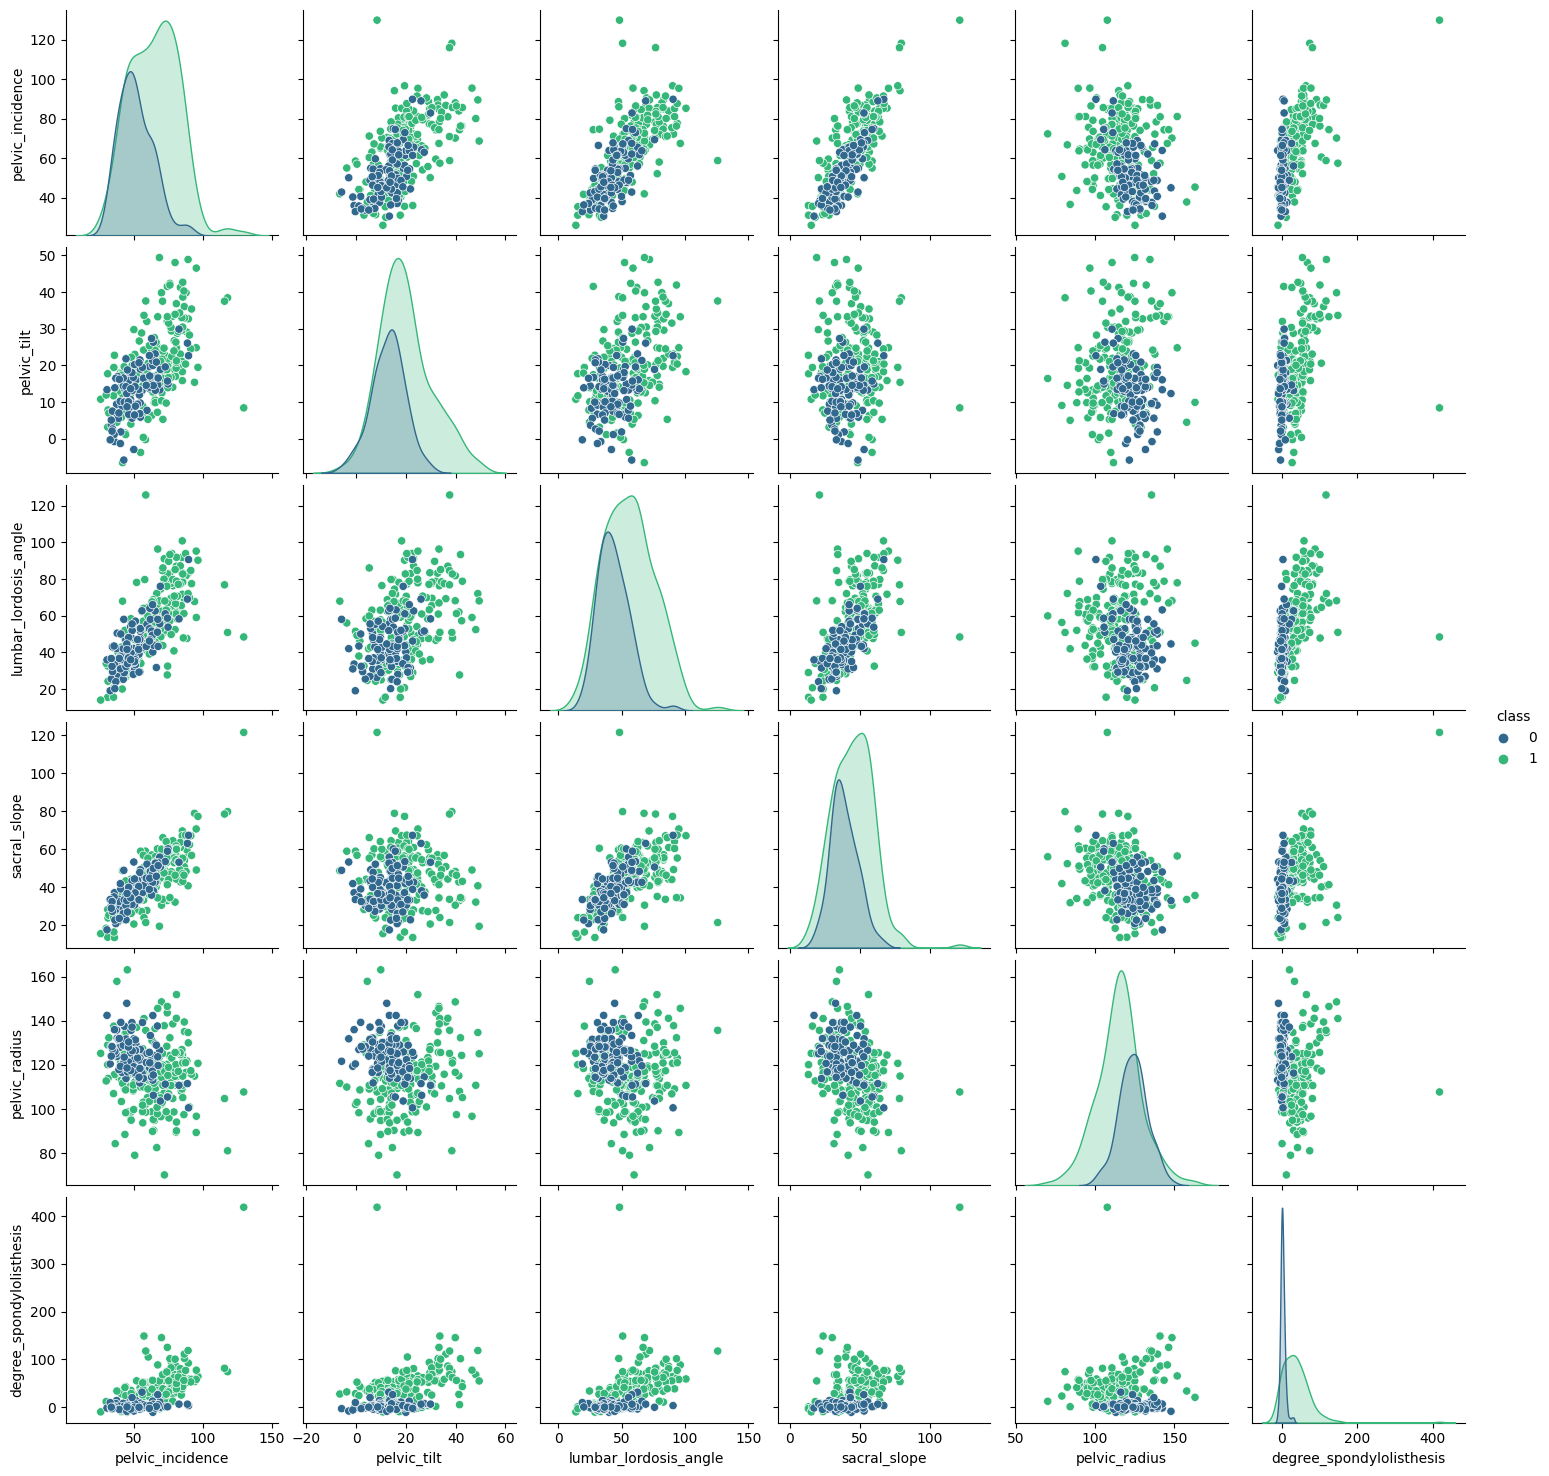

In [10]:
pair_plot = sns.pairplot(df, hue="class", kind="scatter", palette='viridis')
plt.show()

#### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 

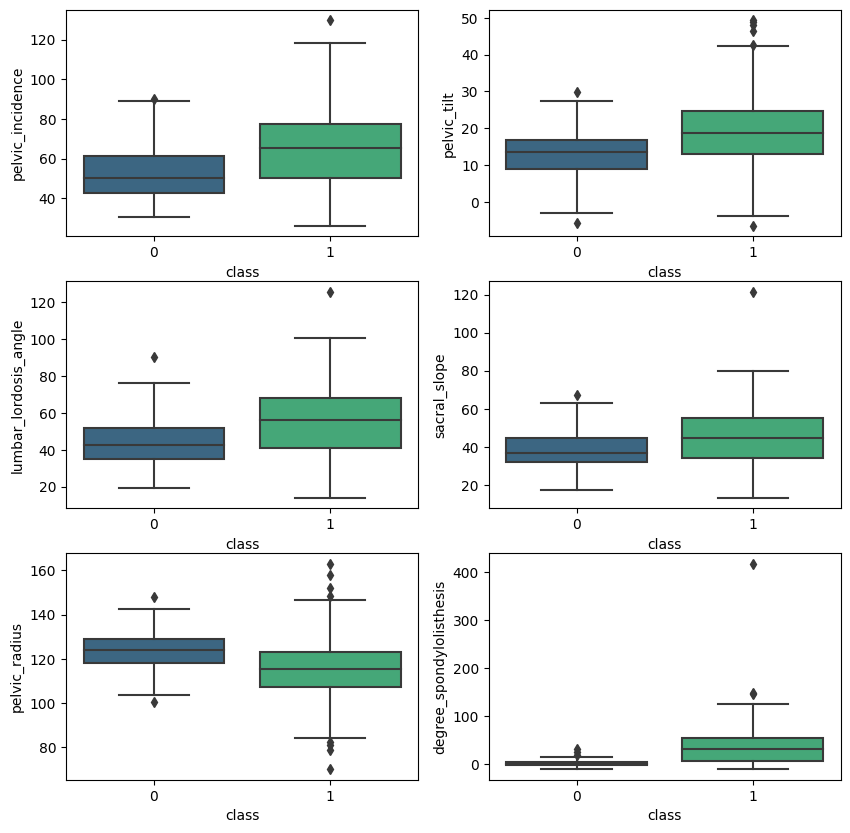

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
columns = ["pelvic_incidence"	,"pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis"]

for i in range(len(columns)):
    sns.boxplot(x="class", y=columns[i], data=df, ax=axes[i // 2, i % 2], palette="viridis")

plt.show()

#### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

In [12]:
train_0 = df[df['class'] == 0].head(70)
train_1 = df[df['class'] == 1].head(140)
train_df = pd.concat([train_0, train_1])

# Create the test set
test_df = df.drop(train_df.index)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('Training set:', train_df.shape)
print('Test set:', test_df.shape)

Training set: (210, 7)
Test set: (100, 7)


In [13]:
Xtrain = train_df.drop(columns=["class"])
ytrain = train_df["class"]
ytrain = ytrain.astype('int')

Xtest = test_df.drop(columns=["class"])
ytest = test_df["class"]
ytest = ytest.astype('int')

In [14]:
Xtrain.shape

(210, 6)

In [15]:
Xtest.shape

(100, 6)

In [16]:
test_df['class'].unique()

array([1, 0], dtype=object)

### (c) Classification using KNN on Vertebral Column Data Set

#### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [17]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(metric='euclidean')

#### ii. Test data with K-Nearest neighbors and take decisions by majority polling.

Plot train and test errors in terms of k for k ∈ { 208 , 205 , . . . , 7 , 4 , 1 , } (in reverse order). You are welcome to use smaller increments of k . Which k* is the most suitable k among those values?

In [18]:
def applyKNN(neighbors):
  knn = KNeighborsClassifier(n_neighbors=neighbors, metric='euclidean')
  knn.fit(Xtrain, ytrain)
  train_acc = accuracy_score(ytrain, knn.predict(Xtrain.values))
  test_acc = accuracy_score(ytest, knn.predict(Xtest.values))
  train_error = 1 - train_acc
  test_error = 1 - test_acc
  return train_acc, test_acc, train_error, test_error


In [19]:
train_errors = []
test_errors = []
train_accs = []
test_accs = []

k_values = range(209, 0, -1)
min_train = 1
min_test = 1
optimal_k = 0

for k in range(209, 0, -1):
  train_acc, test_acc, train_error, test_error = applyKNN(k)
  train_errors.append(train_error)
  test_errors.append(test_error)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

  if train_error < min_train and test_error < min_test:
    optimal_k = k

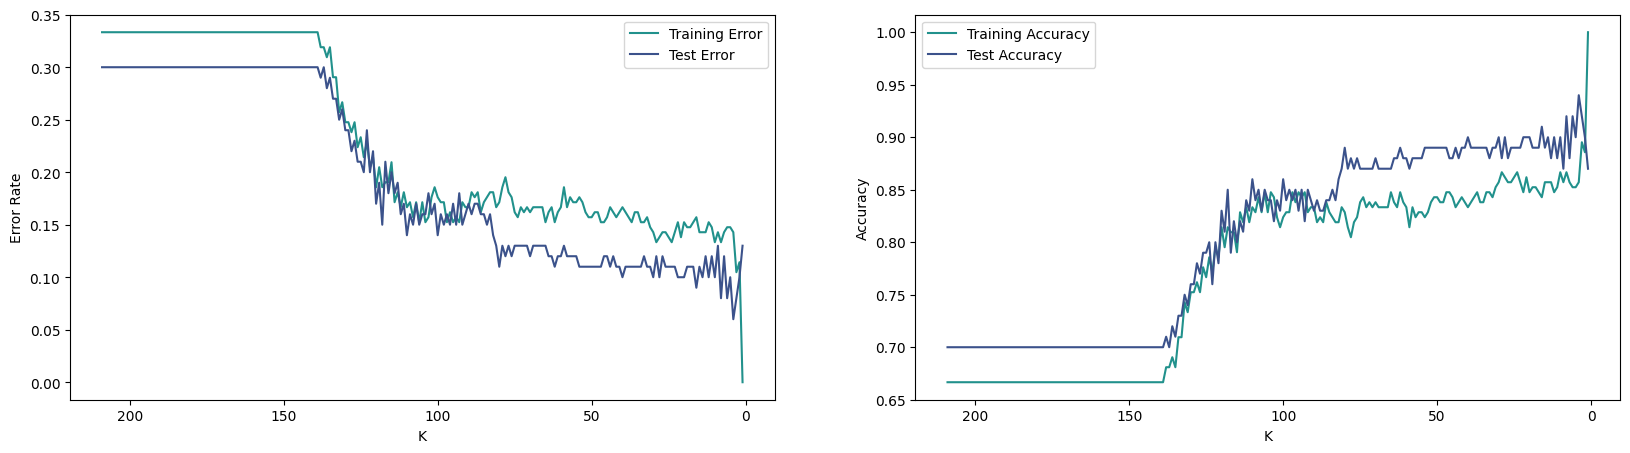

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# error curve
axes[0].plot(k_values, train_errors, label="Training Error", color="#21918c")
axes[0].plot(k_values, test_errors, label="Test Error", color="#3b528b")
axes[0].invert_xaxis()
axes[0].set_xlabel("K")
axes[0].set_ylabel("Error Rate")
axes[0].legend()

# accuracy curve
axes[1].plot(k_values, train_accs, label="Training Accuracy", color="#21918c")
axes[1].plot(k_values, test_accs, label="Test Accuracy", color="#3b528b")
axes[1].invert_xaxis()
axes[1].set_xlabel("K")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.show()

We can see that when k=1, there is a perfect accuracy on the training set, but significant error in the test set.   
The best result is obtained when k=4.

Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*

In [21]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(Xtrain, ytrain)
print("minimum erorr: ", 1 - accuracy_score(ytest, knn.predict(Xtest)))

minimum erorr:  0.06000000000000005


In [22]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(Xtrain, ytrain)
predictions = knn.predict(Xtest)

confusionMatrix = confusion_matrix(ytest, predictions)

TrueNeg, FalsePos, FalseNeg, TruePos = confusionMatrix.ravel()

TruePosRate = TruePos / (TruePos + FalseNeg)
TrueNegRate = TrueNeg / (TrueNeg + FalsePos)

Precision = TruePos / (TruePos + FalsePos)
Recall = TruePos / (TruePos + FalseNeg)

F1_Score = (2 * Precision * Recall) / (Precision + Recall)

print("TP: ", TruePos)
print("FN: ", FalseNeg)
print("TN: ", TrueNeg)
print("FP: ", FalsePos)
print("confusion matrix: \n", confusionMatrix)
print('True Positive Rate:', TruePosRate)
print('True Negative Rate:', TrueNegRate)
print('Precision:', Precision)
print('F1-score:', F1_Score)


TP:  69
FN:  1
TN:  25
FP:  5
confusion matrix: 
 [[25  5]
 [ 1 69]]
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F1-score: 0.9583333333333333


#### iii. Plotting the Learning Curve

Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate , 3 which is obtained by some value of k , against the size of training set, when the size of training set is N ∈ { 10 , 20 , 30 , . . . , 210 } . Note: for each N , select your training set by choosing the first b N/ 3 c rows of Class 0 and the first N − \[ N/ 3 ] rows of Class 1 in the training set you created in 1(b)iii. Also, for each N , select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from { 1 , 6 , 11 , . . . , 196 } . This plot is called a Learning Curve.

In [23]:
def getTrainingSet(n):
  dataset = pd.concat([train_df[train_df['class'] == 0].head(n//3),train_df[train_df['class'] == 1].head(n-(n//3))])
  X = dataset.drop(columns=["class"])
  y = dataset["class"]
  y = y.astype('int')
  return X, y

x_test = Xtest
y_test = ytest

def getBestKandError(x_train, y_train, n):
  kvalues = range(1, n, 5)
  min_error = 1
  for k in kvalues:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(x_train, y_train)
    predictions = model.predict(x_test.values)
    error = 1 - accuracy_score(y_test, predictions)
    if(error < min_error):
      min_error = error
  return min_error


nvalues = range(10, 220, 10)
min_errors = []
for n in nvalues:
  data, labels = getTrainingSet(n)
  min_errors.append(getBestKandError(data, labels, n))

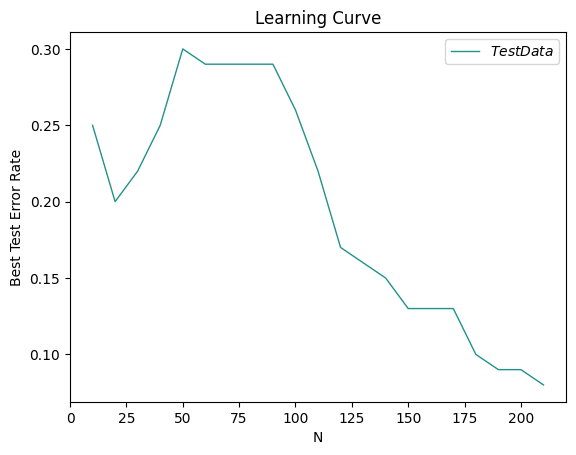

In [24]:
ax = plt.gca()
plt.title('Learning Curve')
ax.set_xlabel('N')
ax.set_ylabel('Best Test Error Rate')
ax.plot(nvalues, min_errors, label = '$Test Data$', color='#21918c', linewidth=1)
plt.legend(loc='upper right')
plt.show()

### (d) Replace the Euclidean metric with the following and test again.

Summarize the test errors (i.e., when k = k ∗ ) in a table. Use all of your training data and select the best k when { 1 , 6 , 11 , . . . , 196 }

#### i. Minkowski Distance

##### a. which becomes Manhatten Distance with p = 1

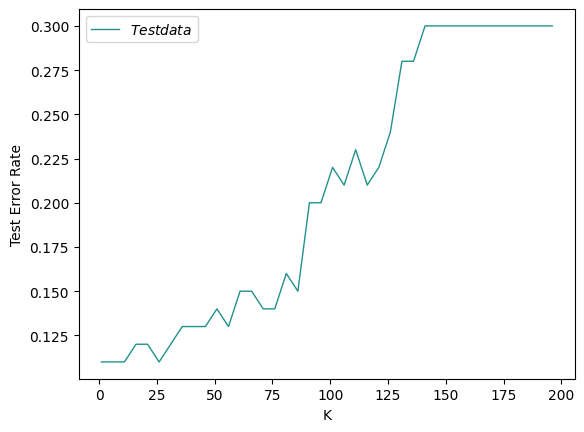

Manhattan Distance
best k is: 26
best test error rate is 0.10999999999999999


In [25]:
kvalues = range(1, 200, 5)
ManhattentestSetErrors = []

for k in kvalues:
  model = KNeighborsClassifier(n_neighbors = k, p=1)
  model.fit(Xtrain, ytrain)
  predictions = model.predict(Xtest.values)
  error = 1 - accuracy_score(ytest, predictions)
  ManhattentestSetErrors.append(error)


ax = plt.gca()
ax.set_xlabel('K')
ax.set_ylabel('Test Error Rate')
ax.plot(kvalues, ManhattentestSetErrors, label = '$Test data$', color='#21918c', linewidth=1)
plt.legend(loc='upper left')
plt.show()

min_error_MD = min(ManhattentestSetErrors)
MD_index = 0
for index, m in zip(kvalues, ManhattentestSetErrors):
    if min_error_MD == m:
        MD_index = index

print('Manhattan Distance')
print('best k is:', MD_index)
print('best test error rate is', min_error_MD)

##### b. with log 10 ( p ) ∈ { 0 . 1 , 0 . 2 , 0 . 3 , . . . , 1 } . In this case, use the k ∗ you found for the Manhattan distance in 1(d)iA. What is the best log 10 ( p )?

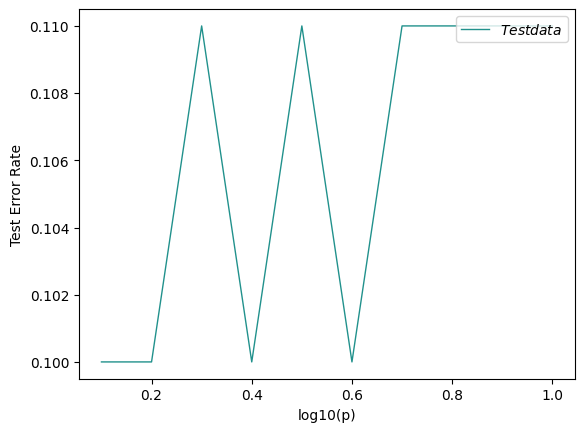

For best error rate:  0.09999999999999998
log(10, p)=  0.1
log(10, p)=  0.2
log(10, p)=  0.4
log(10, p)=  0.6


In [26]:
k = 26
MinkowskiTestErrors = []

log10p = np.arange(0.1, 1.1, 0.1)

for i in log10p:
  newP = pow(10, i)
  model = KNeighborsClassifier(n_neighbors = k, p=newP)
  model.fit(Xtrain, ytrain)
  predictions = model.predict(Xtest)
  error = 1 - accuracy_score(ytest, predictions)
  MinkowskiTestErrors.append(error)

ax = plt.gca()
ax.set_xlabel('log10(p)')
ax.set_ylabel('Test Error Rate')
ax.plot(log10p, MinkowskiTestErrors, label = '$Test data$', color='#21918c', linewidth=1)
plt.legend(loc='upper right')
plt.show()

MinkowskiError = min(MinkowskiTestErrors)
bestLogP = 0
print("For best error rate: ", min(MinkowskiTestErrors))

for index, m in zip(log10p, MinkowskiTestErrors):
  if MinkowskiError == m:
    bestLogP = index
    print('log(10, p)= ', bestLogP)

##### c. which becomes Chebyshev Distance with p → ∞

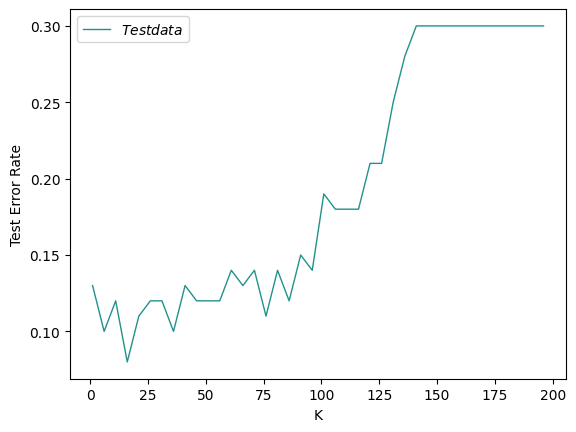

Chebyshev Distance
best k is: 16
best test error rate is 0.07999999999999996


In [27]:
kvalues = range(1, 200, 5)
CheTestSetErrors = []

for k in kvalues:
  model = KNeighborsClassifier(n_neighbors = k, p=float('inf'))
  model.fit(Xtrain, ytrain)
  predictions = model.predict(Xtest.values)
  error = 1 - accuracy_score(ytest, predictions)
  CheTestSetErrors.append(error)

ax = plt.gca()
ax.set_xlabel('K')
ax.set_ylabel('Test Error Rate')
ax.plot(kvalues, CheTestSetErrors, label = '$Test data$', color='#21918c', linewidth=1)
plt.legend(loc='upper left')
plt.show()

minCheError = min(CheTestSetErrors)
bestCDindex = 0

for index, m in zip(kvalues, CheTestSetErrors):
  if minCheError == m:
    bestCDindex = index

print('Chebyshev Distance')
print('best k is:', bestCDindex)
print('best test error rate is', minCheError)

#### ii. Mahalanobis distance

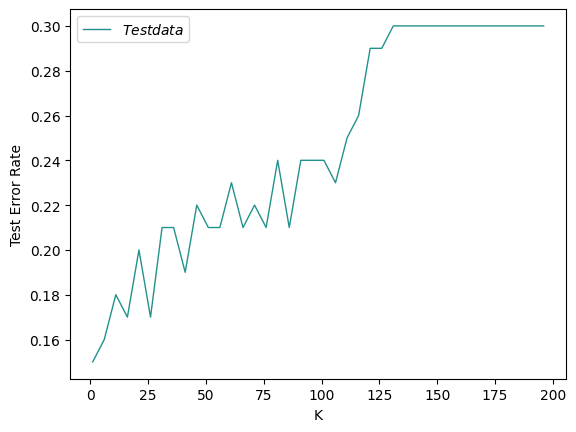

Mahalanobis Distance
best k is: 1
best test error rate is 0.15000000000000002


In [28]:
kvalues = range(1, 200, 5)
testSetErrors = []

for k in kvalues:
  model = KNeighborsClassifier(n_neighbors = k, metric = "mahalanobis", metric_params ={'VI':np.linalg.pinv(np.cov(Xtrain, rowvar=False))})
  model.fit(Xtrain, ytrain)
  predictions = model.predict(Xtest.values)
  error = 1 - accuracy_score(ytest, predictions)
  testSetErrors.append(error)

ax = plt.gca()
ax.set_xlabel('K')
ax.set_ylabel('Test Error Rate')
ax.plot(kvalues, testSetErrors, label = '$Test data$', color='#21918c', linewidth=1)
plt.legend(loc='upper left')
plt.show()

MahaDminError = min(testSetErrors)
MahaDindex = 0

for index, m in zip(kvalues, testSetErrors):
  if MahaDminError == m:
    MahaDindex = index

print('Mahalanobis Distance')
print('best k is:', MahaDindex)
print('best test error rate is', MahaDminError)

#### Summarize all distances in a tabular format

In [29]:
print("Distance Metric \t\t Minimum testing Error")
print("Manhatten Distance \t\t ", min_error_MD)
print("Minkowski Distance \t\t ", MinkowskiError)
print("Chebyshev Distance \t\t ", minCheError)
print("Mahalanobis Distance \t\t ", MahaDminError)

Distance Metric 		 Minimum testing Error
Manhatten Distance 		  0.10999999999999999
Minkowski Distance 		  0.09999999999999998
Chebyshev Distance 		  0.07999999999999996
Mahalanobis Distance 		  0.15000000000000002


### (e) Using weighted decisions

The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ { 1 , 6 , 11 , 16 , . . . , 196 }

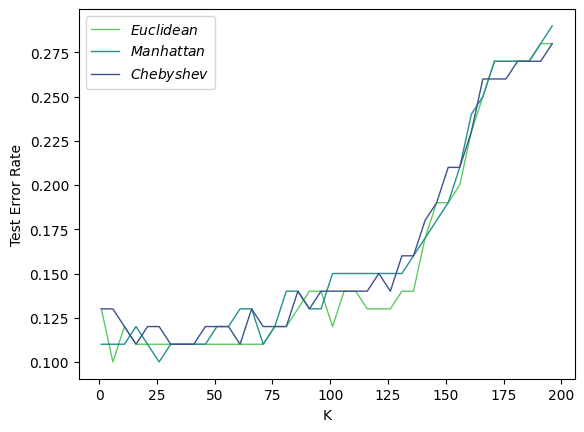

Euclidean: 0.09999999999999998
Manhattan: 0.09999999999999998
Chebyshev: 0.10999999999999999


In [30]:
kvalues = range(1, 200, 5)

EDtestErrorList = []
MHtestErrorList = []
CHEtestErrorList = []

for k in kvalues:
  model1 = KNeighborsClassifier(n_neighbors = k, weights = 'distance', p=2)
  model1.fit(Xtrain, ytrain)
  EDpredictions = model1.predict(Xtest)
  EDerror = 1 - accuracy_score(EDpredictions, ytest)
  EDtestErrorList.append(EDerror)

  model2 = KNeighborsClassifier(n_neighbors = k, weights = 'distance', p=1)
  model2.fit(Xtrain, ytrain)
  MHpredictions = model2.predict(Xtest)
  MHerror = 1 - accuracy_score(MHpredictions, ytest)
  MHtestErrorList.append(MHerror)

  model3 = KNeighborsClassifier(n_neighbors = k, weights = 'distance', p=float('inf'))
  model3.fit(Xtrain, ytrain)
  CHEpredictions = model3.predict(Xtest)
  CHEerror = 1 - accuracy_score(CHEpredictions, ytest)
  CHEtestErrorList.append(CHEerror)


ax = plt.gca()
ax.set_xlabel('K')
ax.set_ylabel('Test Error Rate')
ax.plot(kvalues, EDtestErrorList, label = '$Euclidean$', color='#5ec962', linewidth=1)
ax.plot(kvalues, MHtestErrorList, label = '$Manhattan$', color='#21918c', linewidth=1)
ax.plot(kvalues, CHEtestErrorList, label = '$Chebyshev$', color='#3b528b', linewidth=1)
plt.legend(loc='upper left')
plt.show()

print('Euclidean:', min(EDtestErrorList))
print('Manhattan:', min(MHtestErrorList))
print('Chebyshev:', min(CHEtestErrorList))


### (f) What is the lowest training error rate you achieved in this homework?
Lowest training eror is 0 when k = 1.

### References

Scatterplots - https://seaborn.pydata.org/generated/seaborn.scatterplot.html  
BoxPlots - https://seaborn.pydata.org/generated/seaborn.boxplot.html  
KNN - https://www.digitalocean.com/community/tutorials/k-nearest-neighbors-knn-in-python  
Distance Metrics - https://medium.com/@luigi.fiori.lf0303/distance-metrics-and-k-nearest-neighbor-knn-1b840969c0f4   
Chebyshev and Mahalanobis Distance - https://medium.com/@adityachandavale/knn-distance-metrics-and-how-they-work-mathematically-d58f65f0bd06  
Learning Curve - https://www.dataquest.io/blog/learning-curves-machine-learning/  
